<a href="https://colab.research.google.com/github/swarn007-byte/Customer_churn-fastapi/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('input_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop(columns=['customerID', 'StreamingMovies', 'PaperlessBilling'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.replace({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})
df.head()

/tmp/ipython-input-2918684.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,Month-to-month,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,One year,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,Month-to-month,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,One year,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,Month-to-month,Electronic check,70.70,151.65,1


In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']


In [ ]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Specify numeric columns
numeric_cols = ['tenure', 'MonthlyCharges']

# Fit scaler only on the numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Ensure the notebook directory exists
os.makedirs("notebook", exist_ok=True)

# Save the fitted scaler
SCALER_PATH = "notebook/scaler.pkl"
joblib.dump(scaler, SCALER_PATH)

print(f"Scaler saved successfully at {SCALER_PATH} for columns: {numeric_cols}")


Scaler saved successfully at notebook/scaler.pkl for columns: ['tenure', 'MonthlyCharges']


In [ ]:
pip install tensorflow

In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Build a sequential neural network model with dropout and batch normalization
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the neural network model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

Epoch 1/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6387 - loss: 0.7180 - val_accuracy: 0.7452 - val_loss: 0.5168
Epoch 2/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7168 - loss: 0.5736 - val_accuracy: 0.7956 - val_loss: 0.4516
Epoch 3/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7630 - loss: 0.5051 - val_accuracy: 0.7935 - val_loss: 0.4406
Epoch 4/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7594 - loss: 0.5001 - val_accuracy: 0.7942 - val_loss: 0.4343
Epoch 5/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7750 - loss: 0.4875 - val_accuracy: 0.7963 - val_loss: 0.4307
Epoch 6/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7611 - loss: 0.4890 - val_accuracy: 0.7991 - val_loss: 0.4305
Epoch 7/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7698 - loss: 0.4685 - val_accuracy: 0.7999 - val_loss: 0.4312
Epoch 8/200
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7768 - loss: 0.4835 - val_ac

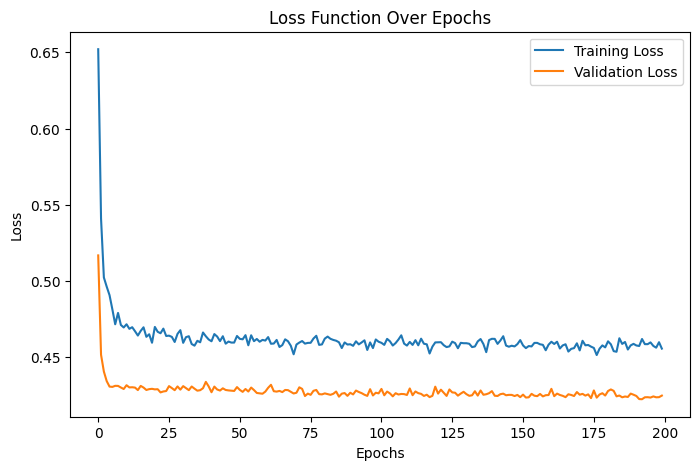

In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import save_model

# Save trained ANN model
model.save("churn_model.h5")
print("✅ ANN model saved as churn_model.h5")


✅ ANN model saved as churn_model.h5
